<a href="https://colab.research.google.com/github/flaviagaia/PR/blob/main/NLP_TFIDF_bs01_AR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#para o pre-processamento
import nltk
import re, string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
#from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
#pre-processamento e modelo

import sklearn 

In [ ]:
df = pd.read_excel("teste01.xlsx")

##Análise exploratória

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18478 entries, 0 to 18477
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   n5_no_unidade_organizacional  18478 non-null  object
 1   classificacao_nova_area       18478 non-null  object
dtypes: object(2)
memory usage: 288.8+ KB


In [ ]:
df.head()

,n5_no_unidade_organizacional,classificacao_nova_area
0,Escola Nacional de Ciências Estatísticas,EDUCAÇÃO
1,Coordenação de Graduação,EDUCAÇÃO
2,Gerência de Orientação Pedagógica e Profissional,EDUCAÇÃO
3,Gerência de Apoio ao Ensino e à Administração ...,EDUCAÇÃO
4,Gerência de Registro e Controle,EDUCAÇÃO


In [ ]:
df.rename(columns={"n5_no_unidade_organizacional":"unidade","classificacao_nova_area":"classe"},inplace=True)
df

,unidade,classe
0,Escola Nacional de Ciências Estatísticas,EDUCAÇÃO
1,Coordenação de Graduação,EDUCAÇÃO
2,Gerência de Orientação Pedagógica e Profissional,EDUCAÇÃO
3,Gerência de Apoio ao Ensino e à Administração ...,EDUCAÇÃO
4,Gerência de Registro e Controle,EDUCAÇÃO
...,...,...
18473,Coordenação de Programa de Pós-Graduação em De...,EDUCAÇÃO
18474,Coordenação de Programa de Pós-Graduação em En...,EDUCAÇÃO
18475,Coordenação de Programa de Pós-Graduação em Ma...,EDUCAÇÃO
18476,Coordenação de Gestão Documental,EDUCAÇÃO


In [ ]:
df.isnull().sum()

unidade    0
classe     0
dtype: int64

In [ ]:
#df.dropna(axis=0,inplace=True)

In [ ]:
df.value_counts('classe')

classe
EDUCAÇÃO    16319
GABINETE     2159
dtype: int64

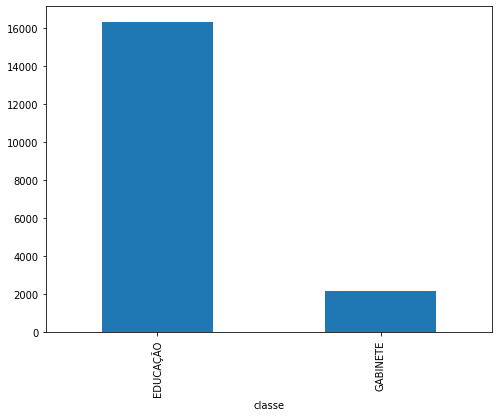

In [ ]:
fig = plt.figure(figsize=(8,6))
df.groupby('classe').unidade.count().plot.bar()
plt.show()

##Pre-processing

In [ ]:
#convert to lowercase, strip and remove punctuations
def preprocess(text):
    text = text.lower() 
    text = text.strip()  
    text = re.compile('<.*?>').sub('', text) 
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  
    text = re.sub('\s+', ' ', text)  
    text = re.sub(r'\[[0-9]*\]',' ',text) 
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) 
    text = re.sub(r'\s+',' ',text)
    return text


# STOPWORD REMOVAL
def stopword(string):
    a= [i for i in string.split() if i not in nltk.corpus.stopwords.words('portuguese')]
    return ' '.join(a)

#LEMMATIZATION
# Initialize the lemmatizer
wl = WordNetLemmatizer()
 
# This is a helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)


In [ ]:
def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))
df['clean_raiz'] = df['unidade'].apply(lambda x: finalpreprocess(x))
df.head()

,unidade,classe,clean_raiz
0,Escola Nacional de Ciências Estatísticas,EDUCAÇÃO,escola nacional ciências estatísticas
1,Coordenação de Graduação,EDUCAÇÃO,coordenação graduação
2,Gerência de Orientação Pedagógica e Profissional,EDUCAÇÃO,gerência orientação pedagógica profissional
3,Gerência de Apoio ao Ensino e à Administração ...,EDUCAÇÃO,gerência apoio ensino administração acadêmica
4,Gerência de Registro e Controle,EDUCAÇÃO,gerência registro controle


In [ ]:
#feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
#x = tfidf.fit_transform(df_amostra['clean_raiz']).toarray()

In [ ]:
df['classe_id'] = df['classe'].factorize()[0] #encoding 

classe_id_df = df[['classe', 'classe_id']].drop_duplicates().sort_values('classe_id')

classe_to_id = dict(classe_id_df.values)
id_to_category = dict(classe_id_df[['classe_id', 'classe']].values)

df.head()

,unidade,classe,clean_raiz,classe_id
0,Escola Nacional de Ciências Estatísticas,EDUCAÇÃO,escola nacional ciências estatísticas,0
1,Coordenação de Graduação,EDUCAÇÃO,coordenação graduação,0
2,Gerência de Orientação Pedagógica e Profissional,EDUCAÇÃO,gerência orientação pedagógica profissional,0
3,Gerência de Apoio ao Ensino e à Administração ...,EDUCAÇÃO,gerência apoio ensino administração acadêmica,0
4,Gerência de Registro e Controle,EDUCAÇÃO,gerência registro controle,0


In [ ]:
#cálculo do vetor tf-idf para cada unidade
tfidf = TfidfVectorizer(ngram_range=(1,2))

features = tfidf.fit_transform(df.clean_raiz).toarray()
#labels = df.classe #verificar se deve passar pelo processo de encoding antes
labels = df.classe_id #quando é executado primeiro o encoding - para a correlação funcionar primeiro deve ser executado o encoding da classe
features.shape


(18478, 14862)

cada uma das 24495 unidade é representada por 16673 (18951) características, representando o tf-idf score para diferentes unigramas e bigramas

In [ ]:
#termos mais correlacionados com cada uma das classes

from sklearn.feature_selection import chi2

N = 2
for classe, classe_id in sorted(classe_to_id.items()):
  features_chi2 = chi2(features, labels == classe_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(classe))
  print("  . Mais correlacionados unigramas:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Mais correlacionados bigramas:\n. {}".format('\n. '.join(bigrams[-N:])))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'EDUCAÇÃO':
  . Mais correlacionados unigramas:
. administrativa
. gabinete
  . Mais correlacionados bigramas:
. secretaria gabinete
. gabinete reitoria
# 'GABINETE':
  . Mais correlacionados unigramas:
. administrativa
. gabinete
  . Mais correlacionados bigramas:
. secretaria gabinete
. gabinete reitoria


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


#Classificação

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['clean_raiz'], df['classe'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [ ]:
print(clf.predict(count_vect.transform(["Coordenação de Desenvolvimento de Pessoas"])))

['EDUCAÇÃO']


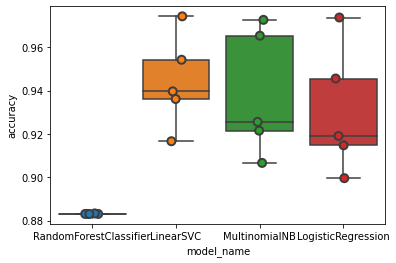

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [ ]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.944206
LogisticRegression        0.930569
MultinomialNB             0.938362
RandomForestClassifier    0.883158
Name: accuracy, dtype: float64

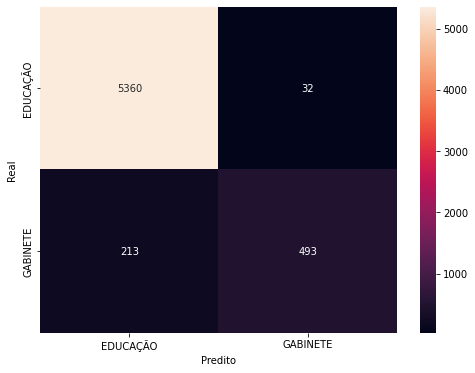

In [ ]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=classe_id_df.classe.values, yticklabels=classe_id_df.classe.values)
plt.ylabel('Real')
plt.xlabel('Predito')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix, balanced_accuracy_score
print(classification_report(y_test,y_pred))
print('Confusion Matrix:',confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      5392
           1       0.94      0.70      0.80       706

    accuracy                           0.96      6098
   macro avg       0.95      0.85      0.89      6098
weighted avg       0.96      0.96      0.96      6098

Confusion Matrix: [[5360   32]
 [ 213  493]]


In [ ]:
from IPython.display import display
for predicted in classe_id_df.classe_id:
  for actual in classe_id_df.classe_id:
    if predicted != actual and conf_mat[actual, predicted] >= 10:
      print("'{}' predito como '{}' : {} exemplos.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['classe', 'unidade']])
      print('')

'GABINETE' predito como 'EDUCAÇÃO' : 213 exemplos.


,classe,unidade
3882,GABINETE,Seção de Gestão de Publicações
4625,GABINETE,Setor de Vendas e Marketing
760,GABINETE,Coordenadoria de Desenvolvimento Humano e Orga...
7337,GABINETE,Assessoria Executiva
557,GABINETE,Coordenação de Parcerias com Europa Latina e p...
...,...,...
253,GABINETE,Coordenação de Gestão de Licitações
204,GABINETE,Serviço de Acompanhamento de Colegiado
1101,GABINETE,Departamento de Ecologia e Recursos Marinhos
14077,GABINETE,Assessoria Especial para Inovação e Empreended...



'EDUCAÇÃO' predito como 'GABINETE' : 32 exemplos.


,classe,unidade
11865,EDUCAÇÃO,Coordenação-Geral de Educação
4874,EDUCAÇÃO,Núcleo de Regulação
8783,EDUCAÇÃO,Centro de Educação Superior à Distância
3318,EDUCAÇÃO,Coordenação do 1º Segmento do Ensino Fundamental
17613,EDUCAÇÃO,Divisão de Projetos Educacionais
1541,EDUCAÇÃO,Divisão do Contencioso
2463,EDUCAÇÃO,Setor de Assistência Social Social
3319,EDUCAÇÃO,Coordenação do 2º Segmento do Ensino Fundamental
4832,EDUCAÇÃO,Departamento de Informática Aplicada
17683,EDUCAÇÃO,Núcleo de Concessão e Acompanhamento de Auxílios



Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
